In [4]:
!git clone https://github.com/lllyasviel/ControlNet.git


Cloning into 'ControlNet'...
remote: Enumerating objects: 1264, done.
remote: Counting objects: 100% (1264/1264), done.
remote: Compressing objects: 100% (700/700), done.
remote: Total 1264 (delta 563), reused 925 (delta 546), pack-reused 0
Receiving objects: 100% (1264/1264), 122.34 MiB | 30.89 MiB/s, done.
Resolving deltas: 100% (563/563), done.


In [5]:
%cd ControlNet
!pip install --upgrade pip
!pip install -r requirements.txt 

/home/jovyan/ControlNet/ControlNet
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [6]:
import os
import basicsr
%cd ControlNet
models_list=['control_sd15_scribble.pth','control_sd15_canny.pth','control_sd15_openpose.pth',
             'control_sd15_depth.pth','control_sd15_hed.pth','control_sd15_mlsd.pth',
             'control_sd15_normal.pth','control_sd15_seg.pth']
for m in models_list:
    remote_model_path = "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/"+m
    modelpath = os.path.join("models", m)
    if not os.path.exists(modelpath):
        from basicsr.utils.download_util import load_file_from_url
        load_file_from_url(remote_model_path, model_dir=modelpath)

    

ckpts_list=['body_pose_model.pth','hand_pose_model.pth','dptt_hybrid-midas-501f0c75.pt','mlsd_large_512_fp32.pth',
            'mlsd_tiny_512_fp32.pth','network-bsds500.pth','upernet_global_small.pth']
for i in ckpts_list:
  remote_model_path = "https://huggingface.co/lllyasviel/ControlNet/resolve/main/annotator/ckpts/"+i
  modelpath = os.path.join("annotator/ckpts", i)
  if not os.path.exists(modelpath):
    from basicsr.utils.download_util import load_file_from_url
    load_file_from_url(remote_model_path, model_dir=modelpath)

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet/ControlNet
Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_scribble.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_scribble.pth/control_sd15_scribble.pth



100%|██████████| 5.32G/5.32G [00:19<00:00, 300MB/s]


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_canny.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_canny.pth/control_sd15_canny.pth



100%|██████████| 5.32G/5.32G [01:05<00:00, 87.6MB/s]


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_openpose.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_openpose.pth/control_sd15_openpose.pth



100%|██████████| 5.32G/5.32G [01:24<00:00, 67.5MB/s]


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_depth.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_depth.pth/control_sd15_depth.pth



100%|██████████| 5.32G/5.32G [01:37<00:00, 58.3MB/s]


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_hed.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_hed.pth/control_sd15_hed.pth



100%|██████████| 5.32G/5.32G [00:29<00:00, 193MB/s] 


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_mlsd.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_mlsd.pth/control_sd15_mlsd.pth



100%|██████████| 5.32G/5.32G [00:35<00:00, 159MB/s] 


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_normal.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_normal.pth/control_sd15_normal.pth



100%|██████████| 5.32G/5.32G [01:31<00:00, 62.5MB/s]


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_seg.pth" to /home/jovyan/ControlNet/ControlNet/models/control_sd15_seg.pth/control_sd15_seg.pth



100%|██████████| 5.32G/5.32G [01:14<00:00, 76.3MB/s]


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/annotator/ckpts/body_pose_model.pth" to /home/jovyan/ControlNet/ControlNet/annotator/ckpts/body_pose_model.pth/body_pose_model.pth



100%|██████████| 200M/200M [00:00<00:00, 211MB/s] 


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/annotator/ckpts/hand_pose_model.pth" to /home/jovyan/ControlNet/ControlNet/annotator/ckpts/hand_pose_model.pth/hand_pose_model.pth



100%|██████████| 141M/141M [00:00<00:00, 404MB/s] 


Downloading: "https://huggingface.co/lllyasviel/ControlNet/resolve/main/annotator/ckpts/dptt_hybrid-midas-501f0c75.pt" to /home/jovyan/ControlNet/ControlNet/annotator/ckpts/dptt_hybrid-midas-501f0c75.pt/dptt_hybrid-midas-501f0c75.pt



HTTPError: HTTP Error 404: Not Found

# Control Stable Diffusion with Canny Edge Maps
Setting both low and high thresholds very low will detect every single edge and created a swirling, chaotic detectmap
Setting both thresholds very high will filter out all but the sharpest, most intense edges, removing areas of soft, fine detail
Widening the gap between the thresholds (i.e. decreasing the low threshold and increasing the high threshold) will give more control to ControlNet as to which edges to keep

num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

In [ ]:
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_canny = CannyDetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_canny.pth/control_sd15_canny.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold):
    with torch.no_grad():
        img = resize_image(HWC3(input_image), image_resolution)
        H, W, C = img.shape

        detected_map = apply_canny(img, low_threshold, high_threshold)
        detected_map = HWC3(detected_map)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [255 - detected_map] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Canny Edge Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                low_threshold = gr.Slider(label="Canny low threshold", minimum=1, maximum=255, value=100, step=1)
                high_threshold = gr.Slider(label="Canny high threshold", minimum=1, maximum=255, value=200, step=1)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, low_threshold, high_threshold]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0
low_threshold=100
high_threshold=200
a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, 
            guess_mode, strength, scale, seed, eta, low_threshold, high_threshold)
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

# Control Stable Diffusion with Human Pose
num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

/home/jovyan/ControlNet


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


logging improved.
cuda
cuda


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is 768 and using 8 heads.
Setting up Me

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet


Global seed set to 31610587


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]


Text(0.5, 1.0, 'Second')

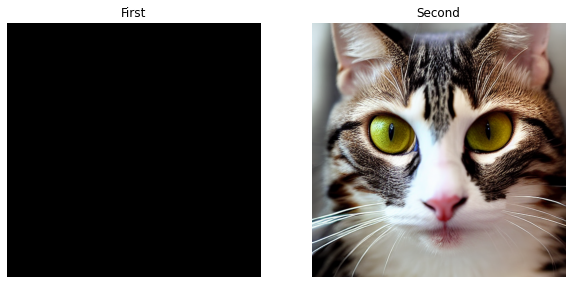

In [1]:
%cd ControlNet
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.openpose import OpenposeDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_openpose = OpenposeDetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_openpose.pth/control_sd15_openpose.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map, _ = apply_openpose(resize_image(input_image, detect_resolution))
        detected_map = HWC3(detected_map)
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_NEAREST)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Human Pose")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                detect_resolution = gr.Slider(label="OpenPose Resolution", minimum=128, maximum=1024, value=512, step=1)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)

%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, 
            detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta)
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")





# DepthtoIMage ControlNet
num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet
ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 he

Global seed set to 31610587


[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet
Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:14<00:00,  1.41it/s]


Text(0.5, 1.0, 'Second')

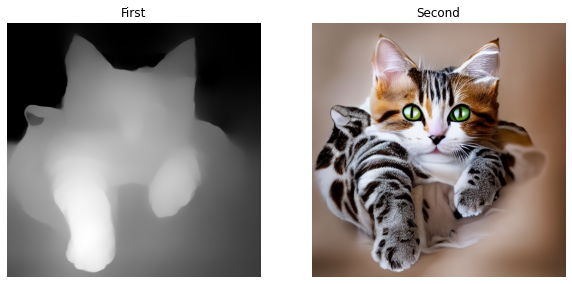

In [2]:
%cd ControlNet
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.midas import MidasDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_midas = MidasDetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_depth.pth/control_sd15_depth.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map, _ = apply_midas(resize_image(input_image, detect_resolution))
        detected_map = HWC3(detected_map)
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results

block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Depth Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                detect_resolution = gr.Slider(label="Depth Resolution", minimum=128, maximum=1024, value=384, step=1)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)
%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution,
            ddim_steps, guess_mode, strength, scale, seed, eta)
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")



## Control Stable Diffusion with Hough Line Maps
HoughLIneControlNet:MLSD is good for finding straight lines and edges. This makes it particularly useful for architecture like room interiors and isometric buildings. It is not very useful for organic shapes or soft smooth curves.
"Hough value threshold" and "Hough distance threshold" can be adjusted to try to remove overlapping, closely spaced lines and "low energy" line fragments.

"Hough Resolution" is used by the preprocessor to scale the image and create a larger, more detailed detectmap at the expense of VRAM or a smaller, less VRAM intensive detectmap at the expense of quality. The detectmap will be scaled up or down so that its shortest dimension will match the hough resolution value.
For example, if a 768x640 image is uploaded and the houghresolution is set to 512, then the resulting detectmap will be 640x512


num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

/home/jovyan/ControlNet


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


logging improved.


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet


Global seed set to 31610587


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:14<00:00,  1.41it/s]


Text(0.5, 1.0, 'Second')

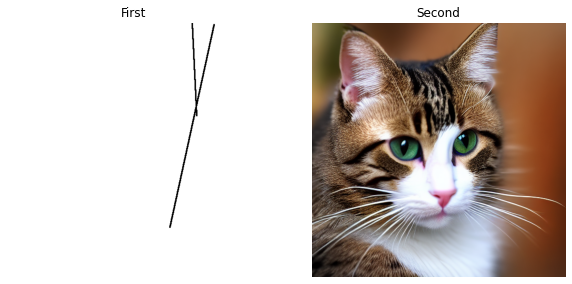

In [2]:
%cd ControlNet
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.mlsd import MLSDdetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_mlsd = MLSDdetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_mlsd.pth/control_sd15_mlsd.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, value_threshold, distance_threshold):
    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map = apply_mlsd(resize_image(input_image, detect_resolution), value_threshold, distance_threshold)
        detected_map = HWC3(detected_map)
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_NEAREST)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [255 - cv2.dilate(detected_map, np.ones(shape=(3, 3), dtype=np.uint8), iterations=1)] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Hough Line Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                detect_resolution = gr.Slider(label="Hough Resolution", minimum=128, maximum=1024, value=512, step=1)
                value_threshold = gr.Slider(label="Hough value threshold (MLSD)", minimum=0.01, maximum=2.0, value=0.1, step=0.01)
                distance_threshold = gr.Slider(label="Hough distance threshold (MLSD)", minimum=0.01, maximum=20.0, value=0.1, step=0.01)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, value_threshold, distance_threshold]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)
%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
value_threshold=0.1
distance_threshold=0.1
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples,
            image_resolution, detect_resolution, ddim_steps, guess_mode, 
            strength, scale, seed, eta, value_threshold, distance_threshold
           )
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")



# Control Stable Diffusion with HED Maps

num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

/home/jovyan/ControlNet


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


logging improved.


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet


Global seed set to 31610587


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


Text(0.5, 1.0, 'Second')

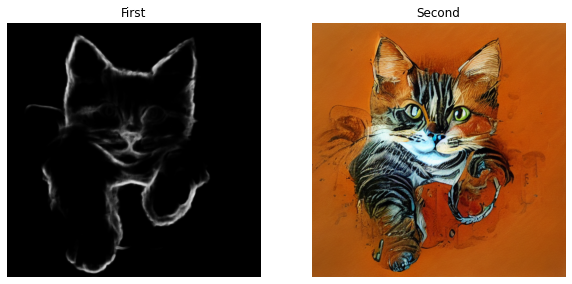

In [2]:
%cd ControlNet
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.hed import HEDdetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_hed = HEDdetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_hed.pth/control_sd15_hed.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map = apply_hed(resize_image(input_image, detect_resolution))
        detected_map = HWC3(detected_map)
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with HED Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                detect_resolution = gr.Slider(label="HED Resolution", minimum=128, maximum=1024, value=512, step=1)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)
%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
value_threshold=0.1
distance_threshold=0.1
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta
           )
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")



# Control Stable Diffusion with Normal Maps
num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

Global seed set to 31610587


[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet
Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


Text(0.5, 1.0, 'Second')

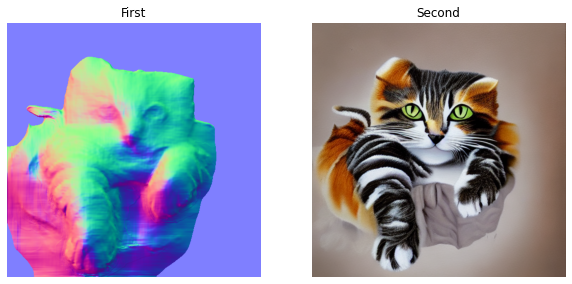

In [4]:
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.midas import MidasDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_midas = MidasDetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_normal.pth/control_sd15_normal.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, bg_threshold):
    with torch.no_grad():
        input_image = HWC3(input_image)
        _, detected_map = apply_midas(resize_image(input_image, detect_resolution), bg_th=bg_threshold)
        detected_map = HWC3(detected_map)
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)

        control = torch.from_numpy(detected_map[:, :, ::-1].copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Normal Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                detect_resolution = gr.Slider(label="Normal Resolution", minimum=128, maximum=1024, value=384, step=1)
                bg_threshold = gr.Slider(label="Normal background threshold", minimum=0.0, maximum=1.0, value=0.4, step=0.01)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta, bg_threshold]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)
%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
bg_threshold=0.4
distance_threshold=0.1
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, 
            ddim_steps, guess_mode, strength, scale, seed, eta, bg_threshold
           )
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")



## Control Stable Diffusion with Interactive Scribbles
num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

In [10]:
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_scribble.pth/control_sd15_scribble.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        img = resize_image(HWC3(input_image['mask'][:, :, 0]), image_resolution)
        H, W, C = img.shape

        detected_map = np.zeros_like(img, dtype=np.uint8)
        detected_map[np.min(img, axis=2) > 127] = 255

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [255 - detected_map] + results


def create_canvas(w, h):
    return np.zeros(shape=(h, w, 3), dtype=np.uint8) + 255


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Interactive Scribbles")
    with gr.Row():
        with gr.Column():
            canvas_width = gr.Slider(label="Canvas Width", minimum=256, maximum=1024, value=512, step=1)
            canvas_height = gr.Slider(label="Canvas Height", minimum=256, maximum=1024, value=512, step=1)
            create_button = gr.Button(label="Start", value='Open drawing canvas!')
            input_image = gr.Image(source='upload', type='numpy', tool='sketch')
            gr.Markdown(value='Do not forget to change your brush width to make it thinner. (Gradio do not allow developers to set brush width so you need to do it manually.) '
                              'Just click on the small pencil icon in the upper right corner of the above block.')
            create_button.click(fn=create_canvas, inputs=[canvas_width, canvas_height], outputs=[input_image])
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)

%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
value_threshold=0.1
distance_threshold=0.1
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples,
            image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta)
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")



ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Control Stable Diffusion with Scribble Maps
num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

Global seed set to 31610587


[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet
Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]


Text(0.5, 1.0, 'Second')

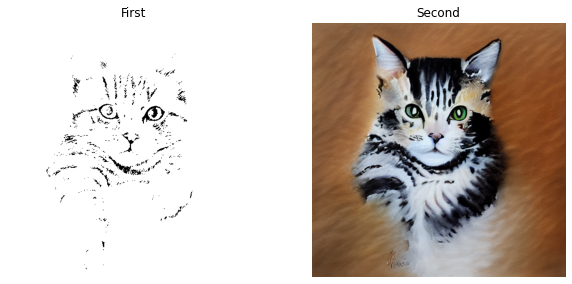

In [11]:
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_scribble.pth/control_sd15_scribble.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        img = resize_image(HWC3(input_image), image_resolution)
        H, W, C = img.shape

        detected_map = np.zeros_like(img, dtype=np.uint8)
        detected_map[np.min(img, axis=2) < 127] = 255

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [255 - detected_map] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Scribble Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)
%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
bg_threshold=0.4
distance_threshold=0.1
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, 
            image_resolution, ddim_steps, guess_mode, strength, scale, seed, eta
           )
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

# Control Stable Diffusion with Segmentation Maps
num_samples = The num_samples parameter in the controlNet model refers to the number of control points or reference points used in the model. In the controlNet model, the input is a pair of images, and the goal is to estimate the transformation that aligns one image with the other. 

image_resolution = The image_resolution parameter in ControlNet refers to the resolution or size of the input images to the network. Specifically, it specifies the height and width of the input images in pixels.

strength = The "Control strength parameter" in a ControlNet model refers to a hyperparameter that controls the degree to which the output of the ControlNet is used to adjust the segmentation mask produced by the SegmentationNet. Specifically, the ControlNet takes as input both the original image and the initial segmentation mask produced by the SegmentationNet, and produces a set of control signals that can be used to adjust the mask. The control strength parameter determines how much weight is given to these control signals when generating the final segmentation mask.
A higher control strength parameter value would mean that the ControlNet's output has a stronger influence on the final segmentation mask, while a lower control strength parameter value would mean that the SegmentationNet's original mask is given more weight.

guess_mode = In guess mode, the ControlNet encoder will try best to recognize the content of the input control map, like depth map, edge map, scribbles, etc, even if you remove all prompts.

detect_resolution= The detect_resolution parameter in ControlNet refers to the resolution or size of the images used by the network to detect features or keypoints. Specifically, it specifies the height and width of the images in pixels that are used for keypoint detection.In the ControlNet model, keypoint detection is used to identify distinctive points or features in the input images that can be used to estimate the transformation that aligns one image with the other. The detect_resolution parameter determines the size of the images used for keypoint detection.


ddim_steps=he ddim_steps parameter in ControlNet refers to the number of steps or levels used in the coarse-to-fine approach to estimate the transformation that aligns one image with the other. Specifically, it determines the number of steps in the differential correlation process used by the model to refine the transformation estimate.
In the ControlNet model, the coarse-to-fine approach involves progressively refining the transformation estimate using images at decreasing resolutions. The ddim_steps parameter determines the number of steps in this process. Each step involves downsampling the input images, estimating the transformation at the lower resolution, and then upsampling the transformation estimate to the original image resolution. The upsampled transformation is then used as the initial estimate for the next step at a lower resolution.


scale = the guidance scale (sometimes referred as cfg - classifier free guidance) is a parameter that controls how much the image generation process follows the text prompt. The higher the value, the more image sticks to a given text input.
But this does not mean that the value should always be set to maximum, as more guidance means less diversity and quality.


seed
eta = eta: (0.5|0-1.0) eta (greek letter η) is a diffusion model variable that mixes in a random amount of scaled noise into each timestep. 0 is no noise, 1.0 is more noise.
The steps parameter has a close relationship with the eta parameter. If you set eta to 0, then you can get decent output with only 50-75 steps. Setting eta to 1.0 favors higher step counts, ideally around 250 and up.
You can actually control how much random noise is added during sampling by setting the eta parameter (1 is the full amount, 0 is none). eta=0 makes for very smooth changes between steps.

a_prompt = The a_prompt parameter in ControlNet is a regularization parameter that controls the influence of a prompt image on the registration process.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The a_prompt parameter is used when there is an additional prompt image available that can be used to improve the registration accuracy. The prompt image can be thought of as a reference image that provides additional information about the desired alignment.

n_prompt = The n_prompt parameter in ControlNet refers to the number of prompt images used to improve the registration accuracy.In the ControlNet model, the input is a pair of images that need to be aligned or registered with each other. The n_prompt parameter is used when there are multiple prompt images available that can be used to improve the registration accuracy. Each prompt image can be thought of as a reference image that provides additional information about the desired alignment.

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet
Use Checkpoint: False
Checkpoint Number: [0, 0, 0, 0]
Use global window for all blocks in stage3
load checkpoint from local path: /home/jovyan/ControlNet/annotator/ckpts/upernet_global_small.pth/upernet_global_small.pth
ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim 

[Errno 2] No such file or directory: 'ControlNet'
/home/jovyan/ControlNet


/home/jovyan/ControlNet/annotator/uniformer/mmseg/models/segmentors/base.py:271: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '
Global seed set to 31610587


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


Text(0.5, 1.0, 'Second')

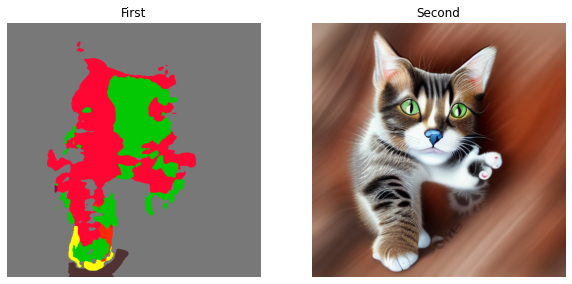

In [3]:
%cd ControlNet
from share import *
import config

import cv2
import einops
import gradio as gr
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.uniformer import UniformerDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler


apply_uniformer = UniformerDetector()

model = create_model('./models/cldm_v15.yaml').cpu()
model.load_state_dict(load_state_dict('./models/control_sd15_seg.pth/control_sd15_seg.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)


def process(input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta):
    with torch.no_grad():
        input_image = HWC3(input_image)
        detected_map = apply_uniformer(resize_image(input_image, detect_resolution))
        img = resize_image(input_image, image_resolution)
        H, W, C = img.shape

        detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_NEAREST)

        control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
        control = torch.stack([control for _ in range(num_samples)], dim=0)
        control = einops.rearrange(control, 'b h w c -> b c h w').clone()

        if seed == -1:
            seed = random.randint(0, 65535)
        seed_everything(seed)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
        un_cond = {"c_concat": None if guess_mode else [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
        shape = (4, H // 8, W // 8)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=True)

        model.control_scales = [strength * (0.825 ** float(12 - i)) for i in range(13)] if guess_mode else ([strength] * 13)  # Magic number. IDK why. Perhaps because 0.825**12<0.01 but 0.826**12>0.01
        samples, intermediates = ddim_sampler.sample(ddim_steps, num_samples,
                                                     shape, cond, verbose=False, eta=eta,
                                                     unconditional_guidance_scale=scale,
                                                     unconditional_conditioning=un_cond)

        if config.save_memory:
            model.low_vram_shift(is_diffusing=False)

        x_samples = model.decode_first_stage(samples)
        x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

        results = [x_samples[i] for i in range(num_samples)]
    return [detected_map] + results


block = gr.Blocks().queue()
with block:
    with gr.Row():
        gr.Markdown("## Control Stable Diffusion with Segmentation Maps")
    with gr.Row():
        with gr.Column():
            input_image = gr.Image(source='upload', type="numpy")
            prompt = gr.Textbox(label="Prompt")
            run_button = gr.Button(label="Run")
            with gr.Accordion("Advanced options", open=False):
                num_samples = gr.Slider(label="Images", minimum=1, maximum=12, value=1, step=1)
                image_resolution = gr.Slider(label="Image Resolution", minimum=256, maximum=768, value=512, step=64)
                strength = gr.Slider(label="Control Strength", minimum=0.0, maximum=2.0, value=1.0, step=0.01)
                guess_mode = gr.Checkbox(label='Guess Mode', value=False)
                detect_resolution = gr.Slider(label="Segmentation Resolution", minimum=128, maximum=1024, value=512, step=1)
                ddim_steps = gr.Slider(label="Steps", minimum=1, maximum=100, value=20, step=1)
                scale = gr.Slider(label="Guidance Scale", minimum=0.1, maximum=30.0, value=9.0, step=0.1)
                seed = gr.Slider(label="Seed", minimum=-1, maximum=2147483647, step=1, randomize=True)
                eta = gr.Number(label="eta (DDIM)", value=0.0)
                a_prompt = gr.Textbox(label="Added Prompt", value='best quality, extremely detailed')
                n_prompt = gr.Textbox(label="Negative Prompt",
                                      value='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality')
        with gr.Column():
            result_gallery = gr.Gallery(label='Output', show_label=False, elem_id="gallery").style(grid=2, height='auto')
    ips = [input_image, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
    run_button.click(fn=process, inputs=ips, outputs=[result_gallery])


block.launch(server_name='0.0.0.0',share=True)

%cd ControlNet
from numpy import asarray
image= np.array(cv2.imread('cat1.jpg'))
inputimage = asarray(image)
# inputimage = np.transpose(inputimage, (1, 2, 0))
# print(inputimage)
prompt="cat"
num_samples=1
image_resolution=512
strength=1.9
guess_mode=False
detect_resolution=512
bg_threshold=0.4
distance_threshold=0.1
ddim_steps=20
scale=9.0
seed=31610587
eta=0.0

a_prompt='best quality, extremely detailed'
n_prompt='longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality'
ips = [inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta]
res=process(inputimage, prompt, a_prompt, n_prompt, num_samples, image_resolution, 
            detect_resolution, ddim_steps, guess_mode, strength, scale, seed, eta
           )
# from google.colab.patches import cv2_imshow
# print(res)
img1=res[0]
img2=res[1]
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")